## Extract fan data as csv files (one per sample)

In [21]:
import json
import pandas as pd
import os

In [22]:
# Get a list of all files
path = 'datasets/home_fan/'
list_files = [path+i for i in os.listdir(path)]
list_files

['datasets/home_fan/high_spd.json',
 'datasets/home_fan/mid_spd.json',
 'datasets/home_fan/low_spd.json',
 'datasets/home_fan/off.json']

In [23]:
data_list = []

for file_name in list_files:
    # Extract them in a list
    type_n_data = []

    with open(file_name) as file:
        for line in file:
            json_obj = json.loads(line)
            type_n_data.append(json_obj)
    

    # Make a df of each sample
    type_df_list = []
    for i, item in enumerate(type_n_data):
        values = item['payload']['values']
        df = pd.DataFrame(values)
        type_df_list.append(df)
    
    data_list.append(type_df_list)

#### df architecture

 0 - xAxis;
 1 - yAxis;
 2 - zAzis;

### Make a list of the variances for one type

In [24]:
# Type 1 - Analysis
type_1 = data_list[3]

# List of means
type_1_means = []
for i in range(10):
    type_1_means.append(type_1[i].mean())
pd.DataFrame(type_1_means).var()

0    2.778907e-07
1    9.308285e-07
2    1.299041e-06
dtype: float64

### Plot the variance for a type

In [25]:
var_list = []
for i in data_list:
    list_means = []
    for j in range(20):
        list_means.append(i[j].mean())
    var_list.append(pd.DataFrame(list_means).var())

<AxesSubplot:>

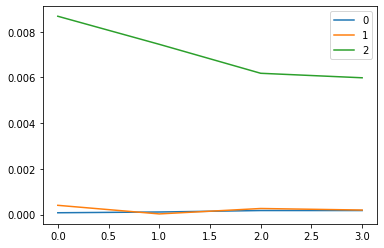

In [26]:
pd.DataFrame(var_list).plot()

### Place each sample in a separate csv file

In [50]:
import csv

# High Speed data
high_spd_data_df = data_list[0]

index = 0

# Place each sample in a csv file
for sample in high_spd_data_df:
    # Save as csv file
    sample.to_csv(path_or_buf='datasets/home_fan/csv_data/high_spd/'+str(index)+".csv", header=False, index=False)
    # Increment index
    index+=1
    
len(high_spd_data_df)

39